# Import Library

In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats.proportion as sp
import matplotlib.pyplot as plt

import seaborn as sns

# AB Testing / Experimental Design

## Import Dataset

In [2]:
df_abtest = pd.read_csv('ab_data.csv')

In [4]:
df_abtest.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
df_abtest.shape

(294478, 5)

## Separate Control and Treatment Dataset

In [6]:
control = df_abtest[df_abtest['group']=='control']
treatment = df_abtest[df_abtest['group']=='treatment']

In [7]:
control.shape

(147202, 5)

In [8]:
treatment.shape

(147276, 5)

## Calculate Number of Success and Number of Observation

In [9]:
## Hitung jumlah yang akhirnya converted
n_success_control = control['converted'].sum()
n_success_treatment = treatment['converted'].sum()

## Menghitung semua participant per masing masing variable
n_obs_control = control['converted'].count()
n_obs_treatment = treatment['converted'].count()

In [10]:
print(n_success_control)

17723


In [10]:
print(n_success_treatment)

17514


In [11]:
print(n_obs_control)

147202


In [12]:
print(n_obs_treatment)

147276


## Calculate Descriptive Statistics

In [11]:
## Kita hitung conversion ratenya (registration rate)
control_conversion_rate = n_success_control/n_obs_control
treatment_conversion_rate = n_success_treatment/n_obs_treatment

In [13]:
print('Conversion Rate from Control : {0:0.4f}%'.format(control_conversion_rate*100))
print('Conversion Rate from Treatment : {0:0.4f}%'.format(treatment_conversion_rate*100))

Conversion Rate from Control : 12.0399%
Conversion Rate from Treatment : 11.8920%


(0.118, 0.1205)

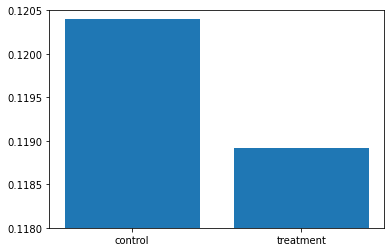

In [19]:
x = ['control','treatment']
value = [control_conversion_rate,treatment_conversion_rate]
plt.bar(x,value)

plt.ylim(0.118,0.1205)

***is the difference significance?*** <br>

## Do Hypothesis Testing

In [14]:
## making array
success = np.array([n_success_control,n_success_treatment])
obs = np.array([n_obs_control,n_obs_treatment])

H0: existing design and new design **have same** conversion rate <br>
H1: existing design and new design **do not have same** conversion rate

In [15]:
stats,pvalue = sp.proportions_ztest(success,obs)

In [16]:
print('P-Value : {0:0.4f}'.format(pvalue))
if pvalue >= 0.05:
    print('Insufficient to reject H0')
else :
    print('Sufficient to reject H0')

P-Value : 0.2161
Insufficient to reject H0
